In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
data = pd.read_csv("/content/Modified_SQL_Dataset.csv")

In [ ]:
data.head(n=5)

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['Label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

Label
0    19537
1    11382
Name: count, dtype: int64
Jumlah kelas unik: 2


In [ ]:
print(data.columns)

Index(['Query', 'Label'], dtype='object')


In [ ]:
print(data['Label'].value_counts())

Label
0    19537
1    11382
Name: count, dtype: int64


Index(['Query', 'Label'], dtype='object')
Label
normal         19537
injeksi SQL    11382
Name: count, dtype: int64
Jumlah kelas unik: 2


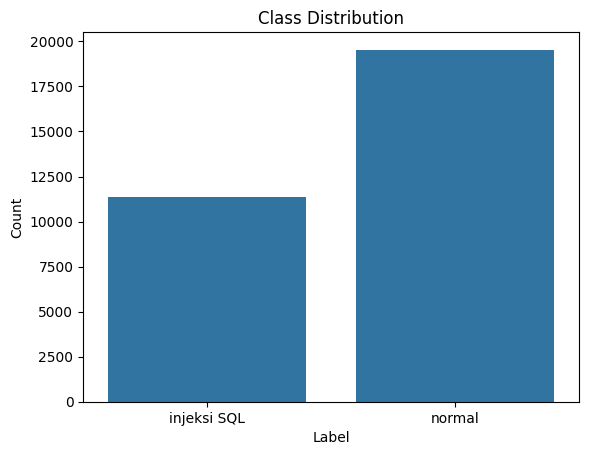

<ipython-input-7-8d39e36e7e6a>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'normal': 0, 'injeksi SQL': 1})


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names
print(data.columns)

# Replace 0 and 1 with 'normal' and 'DDoS'
data['Label'] = data['Label'].replace({0: 'normal', 1: 'injeksi SQL'})

# Visualize the class distribution
kelas = data['Label'].value_counts()
print(kelas)

jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualize the class distribution
sns.countplot(x='Label', data=data)  # Adjust 'Label' if needed
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Convert back to numerical labels for modeling
data['Label'] = data['Label'].replace({'normal': 0, 'injeksi SQL': 1})

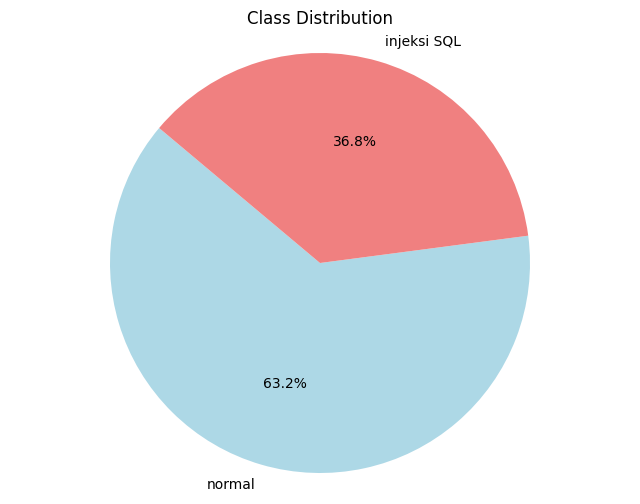

In [ ]:
# Visualize the class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas, labels=kelas.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset



In [ ]:
# Label Encoding untuk target (Label)
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Mengonversi teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Ambil 5000 fitur teratas (token yang paling sering muncul)
X = vectorizer.fit_transform(data['Query']).toarray()  # Fit dan transform kolom 'Query'

y = data['Label_encoded'].values
print(f'X shape: {X.shape}')

X shape: (30919, 5000)


In [ ]:
# SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'X_res shape: {X_res.shape}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


X_res shape: (39074, 5000)


In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Menampilkan jumlah data untuk train dan test
print(f'Jumlah data latih (X_train): {X_train.shape[0]}')  # Menampilkan jumlah baris (data) di train
print(f'Jumlah data uji (X_test): {X_test.shape[0]}')  # Menampilkan jumlah baris (data) di test

Jumlah data latih (X_train): 31259
Jumlah data uji (X_test): 7815


In [ ]:
print(f'Jumlah label latih (y_train): {y_train.shape[0]}')
print(f'Jumlah label uji (y_test): {y_test.shape[0]}')

Jumlah label latih (y_train): 31259
Jumlah label uji (y_test): 7815


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization to convert SQL queries to numerical data
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(data['Query']).toarray()

In [ ]:
# Set a better SMOTE configuration to handle class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights_tensor = torch.FloatTensor(class_weights)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fold 1
Accuracy for fold 1: 98.84%
F1 Score for fold 1: 0.9883
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1970
           1       0.99      0.98      0.98      1122

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



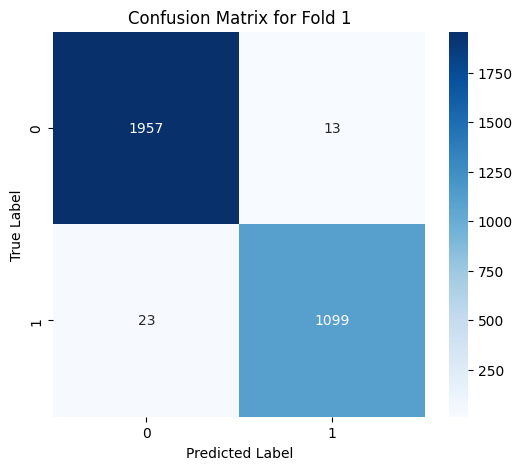

Fold 2
Accuracy for fold 2: 98.54%
F1 Score for fold 2: 0.9854
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2004
           1       0.99      0.97      0.98      1088

    accuracy                           0.99      3092
   macro avg       0.99      0.98      0.98      3092
weighted avg       0.99      0.99      0.99      3092



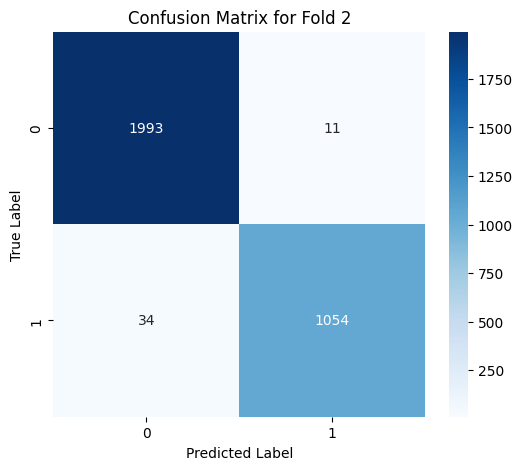

Fold 3
Accuracy for fold 3: 99.00%
F1 Score for fold 3: 0.9900
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1965
           1       0.99      0.98      0.99      1127

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



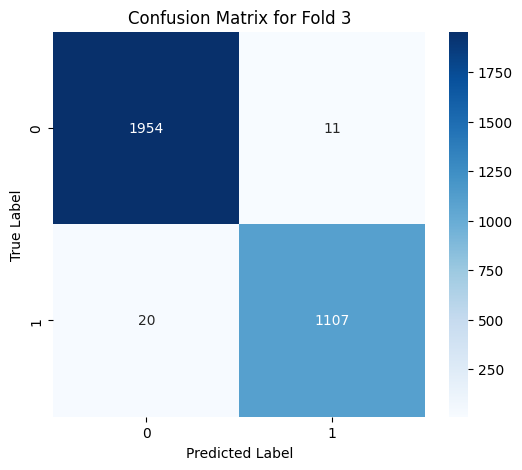

Fold 4
Accuracy for fold 4: 98.84%
F1 Score for fold 4: 0.9884
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1931
           1       0.98      0.99      0.98      1161

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



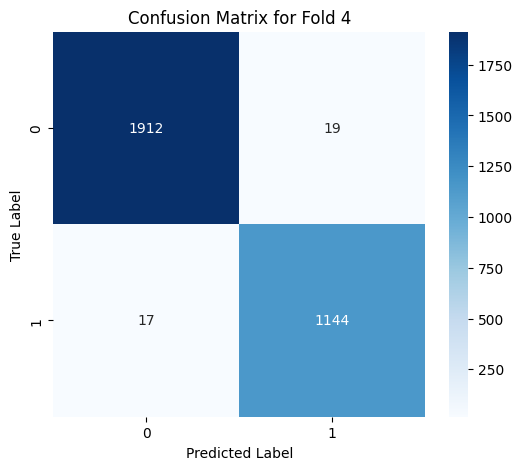

Fold 5
Accuracy for fold 5: 98.77%
F1 Score for fold 5: 0.9877
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1949
           1       0.98      0.99      0.98      1143

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



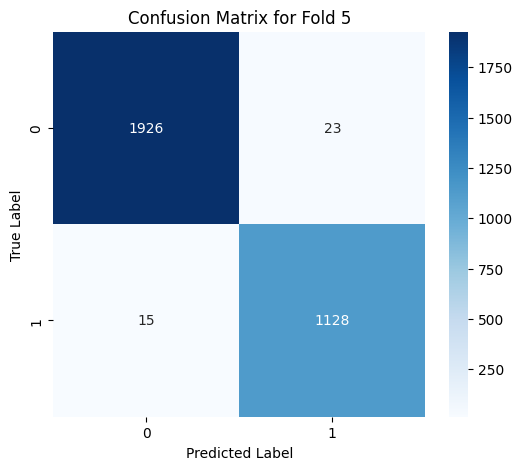

Fold 6
Accuracy for fold 6: 98.71%
F1 Score for fold 6: 0.9871
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1910
           1       0.98      0.98      0.98      1182

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



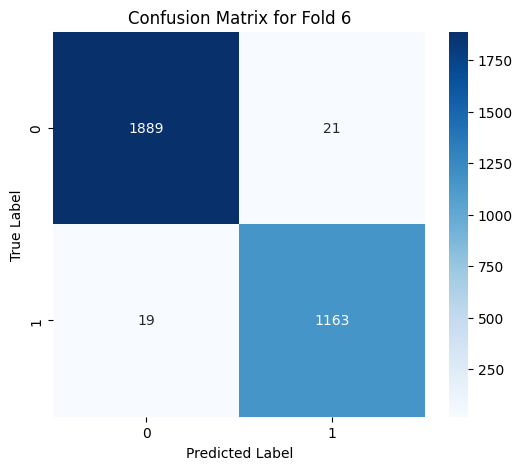

Fold 7
Accuracy for fold 7: 98.93%
F1 Score for fold 7: 0.9893
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1951
           1       0.99      0.98      0.99      1141

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



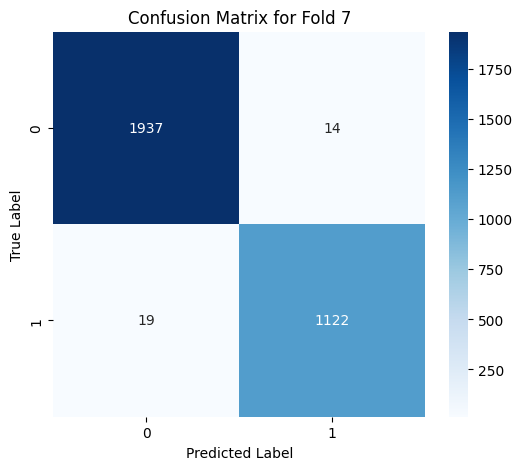

Fold 8
Accuracy for fold 8: 98.87%
F1 Score for fold 8: 0.9887
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1976
           1       0.98      0.99      0.98      1116

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



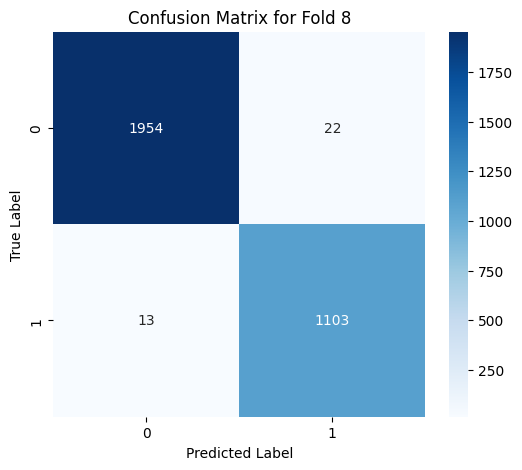

Fold 9
Accuracy for fold 9: 98.61%
F1 Score for fold 9: 0.9861
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1948
           1       0.98      0.98      0.98      1144

    accuracy                           0.99      3092
   macro avg       0.98      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



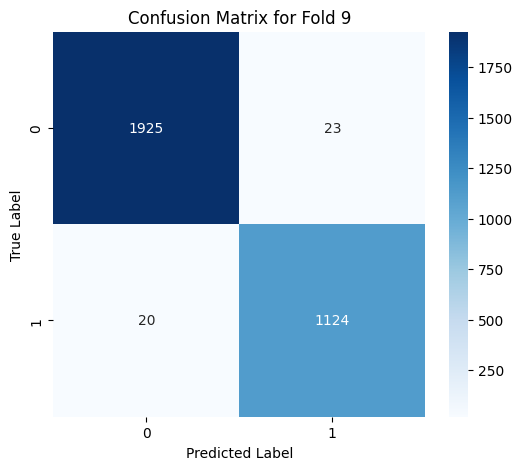

Fold 10
Accuracy for fold 10: 99.06%
F1 Score for fold 10: 0.9906
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.99      0.99      0.99      1158

    accuracy                           0.99      3091
   macro avg       0.99      0.99      0.99      3091
weighted avg       0.99      0.99      0.99      3091



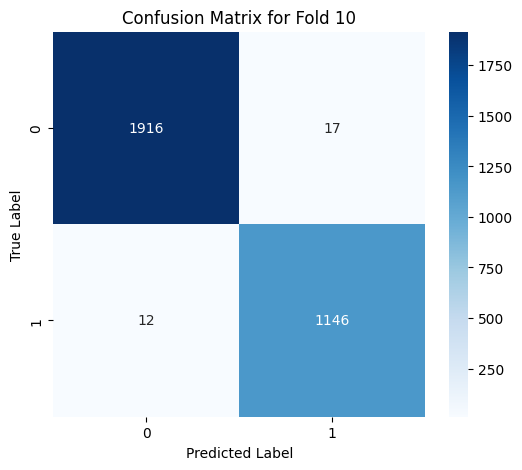

Average Accuracy: 98.82%
Average F1 Score: 0.9882


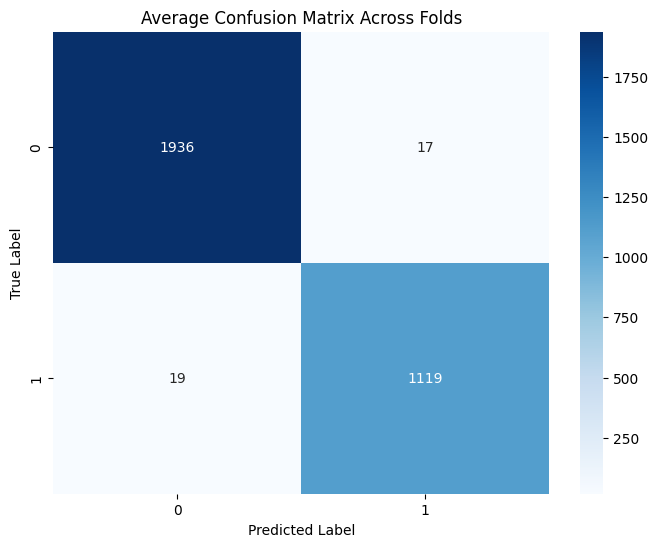

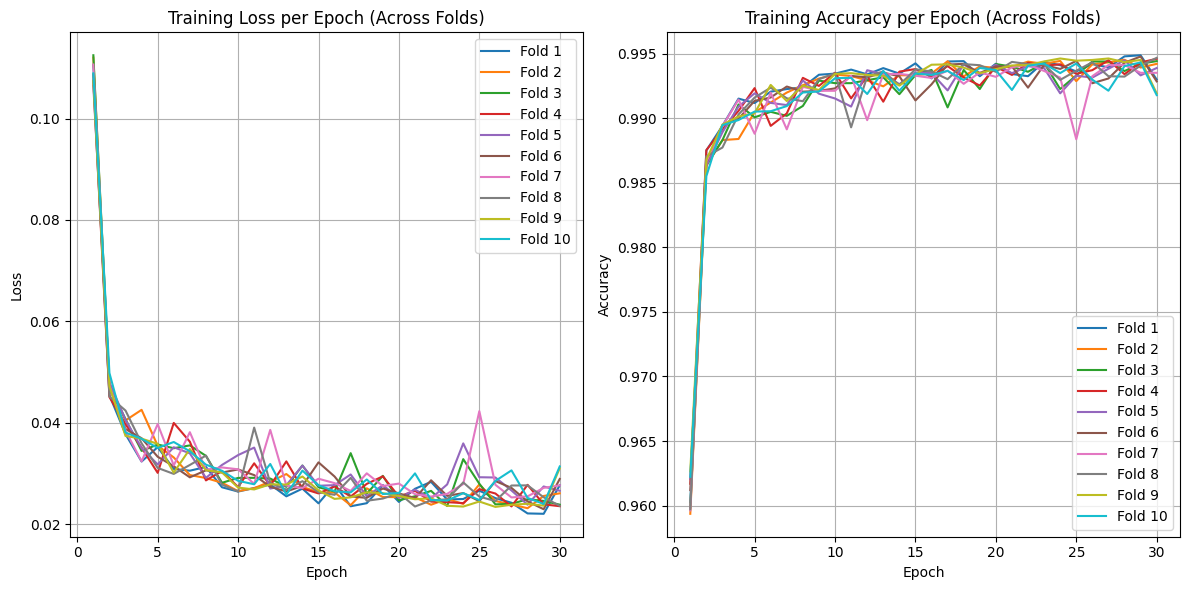

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# TST Model Definition
class TSTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=128, nhead=4, num_layers=4, dropout=0.1):
        super(TSTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Transform input dim to d_model
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True, dropout=dropout),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Final output layer

    def forward(self, x):
        x = self.embedding(x)  # Linear embedding
        x = self.transformer_encoder(x)  # Transformer encoding
        x = x.mean(dim=1)  # Pooling across sequence length
        return self.fc(x)


# Load and preprocess data
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])
class_names = label_encoder.classes_

kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

# Track losses and accuracies across all folds
all_epoch_losses = []
all_epoch_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_tfidf)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_tfidf[train_index], X_tfidf[val_index]
    y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

    # Handle class imbalance with SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
    class_weights_tensor = torch.FloatTensor(class_weights)

    # Model setup
    model = TSTModel(input_dim=X_train_res.shape[1], num_classes=2, d_model=128, nhead=4, num_layers=4)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_res).unsqueeze(1)  # Add sequence dimension
    y_train_tensor = torch.LongTensor(y_train_res)
    X_val_tensor = torch.FloatTensor(X_val).unsqueeze(1)  # Add sequence dimension
    y_val_tensor = torch.LongTensor(y_val.values)

    # DataLoader setup
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Tracking fold losses and accuracies
    fold_losses = []
    fold_accuracies = []

    # Training loop
    for epoch in range(30):  # Modify number of epochs if necessary
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            # Compute accuracy
            _, y_pred = torch.max(outputs, 1)
            correct += (y_pred == labels).sum().item()
            total += labels.size(0)

        fold_losses.append(epoch_loss / len(train_loader))
        fold_accuracies.append(correct / total)

    all_epoch_losses.append(fold_losses)
    all_epoch_accuracies.append(fold_accuracies)

    # Validation and metrics
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val_tensor)
        _, y_pred = torch.max(outputs_val, 1)

    accuracy = accuracy_score(y_val, y_pred.numpy())
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_accuracy.append(accuracy)
    all_f1_scores.append(f1)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)

    # Print metrics and classification report
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(y_val, y_pred.numpy(), target_names=[str(cls) for cls in class_names]))

    # Confusion matrix plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for Fold {fold + 1}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot average accuracy and F1 score
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Average confusion matrix
avg_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix, annot=True, fmt='.0f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Average Confusion Matrix Across Folds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Loss and Accuracy Graphs
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
for i, losses in enumerate(all_epoch_losses):
    plt.plot(range(1, len(losses) + 1), losses, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch (Across Folds)')
plt.legend()
plt.grid()

# Accuracy plot
plt.subplot(1, 2, 2)
for i, accuracies in enumerate(all_epoch_accuracies):
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=f"Fold {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch (Across Folds)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Accuracy on Test Data: 99.31%
F1 Score on Test Data: 0.9931
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3870
           1       1.00      0.99      0.99      3945

    accuracy                           0.99      7815
   macro avg       0.99      0.99      0.99      7815
weighted avg       0.99      0.99      0.99      7815

Confusion Matrix on Test Data:
[[3864    6]
 [  48 3897]]


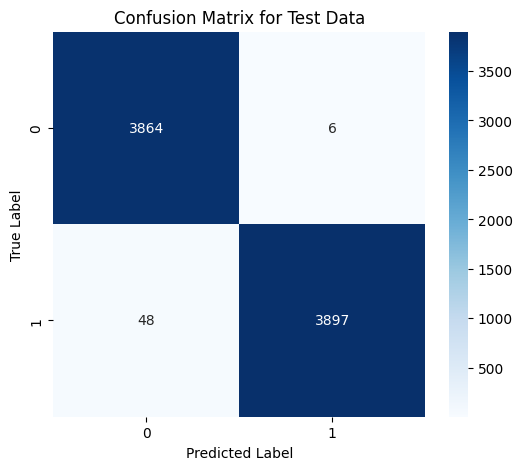

In [ ]:
# Test Model with Unseen Data (X_test, y_test)
model.eval()  # Set model to evaluation mode

# Convert data test to PyTorch tensor
X_test_tensor = torch.FloatTensor(X_test).unsqueeze(1)  # Add sequence dimension
y_test_tensor = torch.LongTensor(y_test)

# Inference
with torch.no_grad():
    outputs_test = model(X_test_tensor)  # Get model output
    _, y_pred_test = torch.max(outputs_test, 1)  # Get predictions by taking the argmax

# Convert predictions to numpy array for compatibility with sklearn
y_pred_test_numpy = y_pred_test.numpy()

# Accuracy Score
accuracy_test = accuracy_score(y_test, y_pred_test_numpy)
print(f'Accuracy on Test Data: {accuracy_test * 100:.2f}%')

# F1 Score
f1_test = f1_score(y_test, y_pred_test_numpy, average='weighted')
print(f'F1 Score on Test Data: {f1_test:.4f}')

# Classification Report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test_numpy))

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test_numpy)
print("Confusion Matrix on Test Data:")
print(conf_matrix_test)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='.0f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()